# Data Sets

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn import linear_model

In [2]:
data = pd.ExcelFile('PATIENT2.xlsx')
data0 = pd.ExcelFile('CONTROL2.xlsx')

AAo = pd.read_excel(data,"AAo")
AAo0 = pd.read_excel(data0,"AAo")
AArch = pd.read_excel(data,"AArch")
AArch0 = pd.read_excel(data0,"AArch")

AAo = AAo.drop(["Diameter"], axis=1)
AAo = AAo.drop(AAo[AAo["Classification"]==3].index)
AAo0 = AAo0.drop(["Diameter"], axis=1)
AAo0 = AAo0.drop(AAo0[AAo0["Classification"]==3].index)

AArch = AArch.drop(["Diameter"], axis=1)
AArch = AArch.drop(AArch[AArch["Classification"]==3].index)
AArch0 = AArch0.drop(["Diameter"], axis=1)
AArch0 = AArch0.drop(AArch0[AArch0["Classification"]==3].index)

AAo_and_AArch = pd.concat([AAo, AArch], axis = 0)
Control_AAo_and_AArch = pd.concat([AAo0, AArch0], axis = 0)
Base = AAo_and_AArch

In [3]:
#Pacientes tipo 0
Control_AAo_and_AArch = pd.concat([AAo0, AArch0], axis = 0)

#Pacientes tipo 1
PAT1 = AAo_and_AArch.drop(AAo_and_AArch[AAo_and_AArch["Classification"]==2].index)

#Pacientes tipo 2
PAT2 = Base.drop(Base[Base["Classification"]==1].index)


In [4]:
PAT0 = Control_AAo_and_AArch.drop(["Classification"], axis=1)
PAT1 = PAT1.drop(["Classification"], axis=1)
PAT2 = PAT2.drop(["Classification"], axis=1)

0-1

0-2

1-2

0-1-2

In [5]:
PAT0and1 = pd.concat([PAT0, PAT1], axis = 0)
PAT0and2 = pd.concat([PAT0, PAT2], axis = 0)
PAT1and2 = pd.concat([PAT1, PAT2], axis = 0)
PAT012 = pd.concat([PAT0, PAT1, PAT2], axis = 0)

combinations = [(PAT0and1,"Pacientes 0-1"), (PAT0and2, "Pacientes 0-2"), (PAT1and2, "Pacientes 1-2"), (PAT012, "Pacientes 0-1-2")]

https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html#sphx-glr-auto-examples-linear-model-plot-ols-py

https://scikit-learn.org/stable/modules/linear_model.html?highlight=linear+regression

https://www.kaggle.com/code/divan0/multiple-linear-regression

https://www.kaggle.com/code/kanncaa1/machine-learning-tutorial-for-beginners




In [6]:
def LinearPlot(df,nombre_clase):
  for params in df:
    X = df[params].values.reshape(-1,1)
    y = df["Age"].values

  ################################################ Train #############################################

    ols = linear_model.LinearRegression()
    model = ols.fit(X, y)
    response = model.predict(X)

  ############################################## Evaluate ############################################

    r2 = model.score(X, y)

  ############################################## Plot ################################################

    plt.style.use('default')
    plt.style.use('ggplot')

    fig, ax = plt.subplots(figsize=(8, 4))

    ax.plot(X, response, color='k', label='Regression model')
    ax.scatter(X, y, edgecolor='k', facecolor='grey', alpha=0.7, label=params)
    ax.set_ylabel("Age", fontsize=14)
    ax.set_xlabel(params, fontsize=14)
    ax.legend(facecolor='white', fontsize=11)
    ax.set_title(f'{params} en {nombre_clase}: $R^2= %.2f$' % r2, fontsize=18)

    fig.tight_layout()

# Regresión Lineal Pacientes 0-1

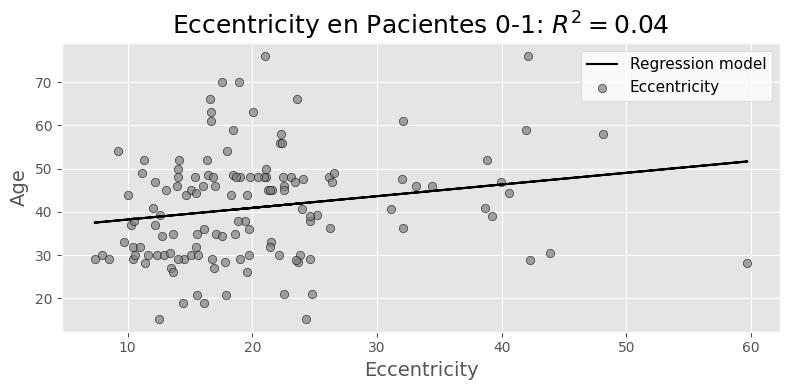

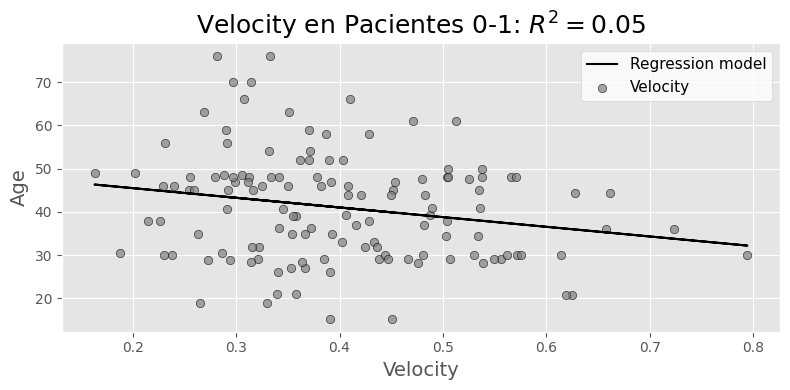

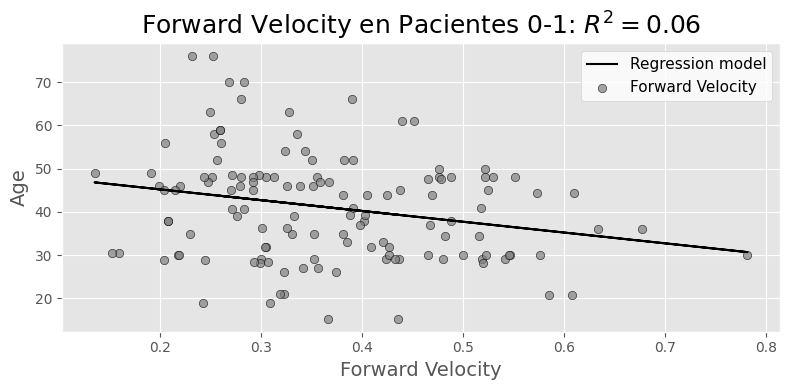

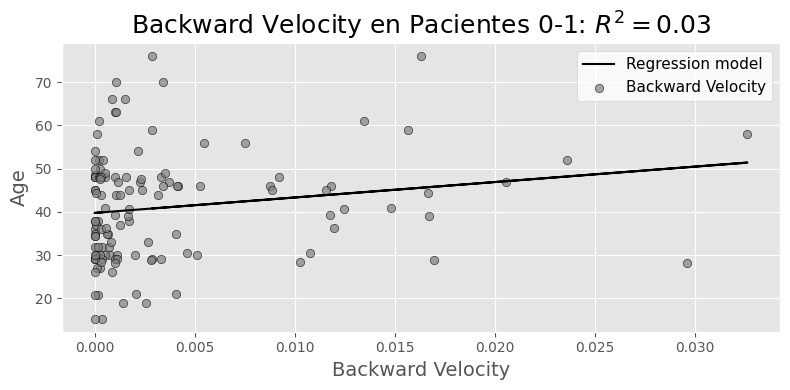

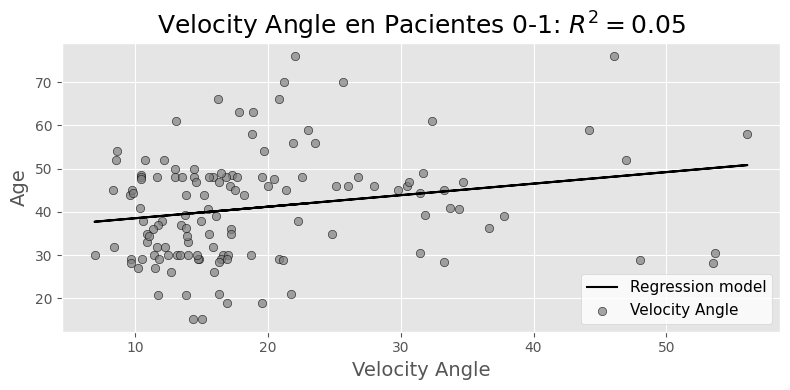

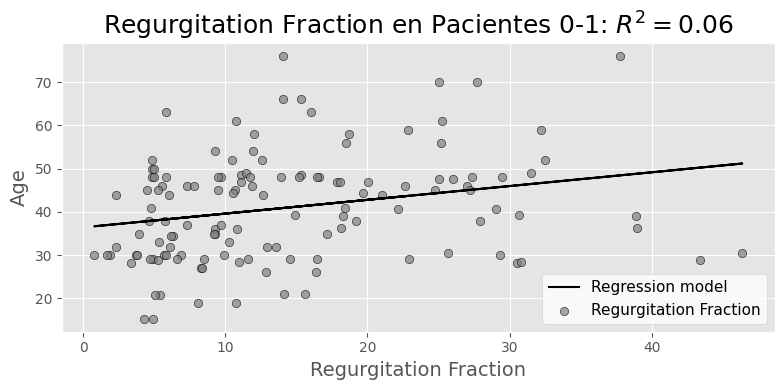

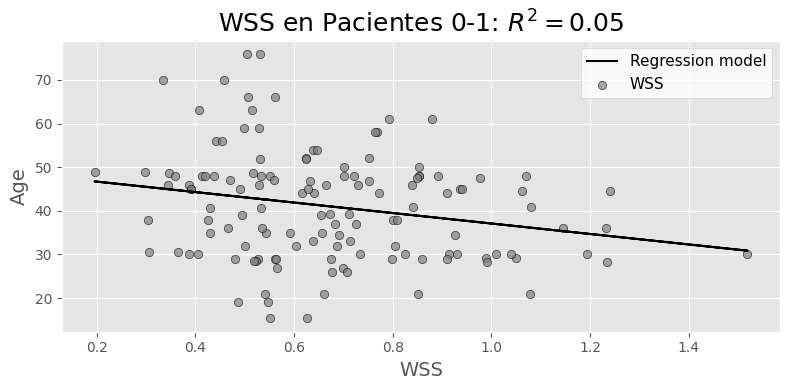

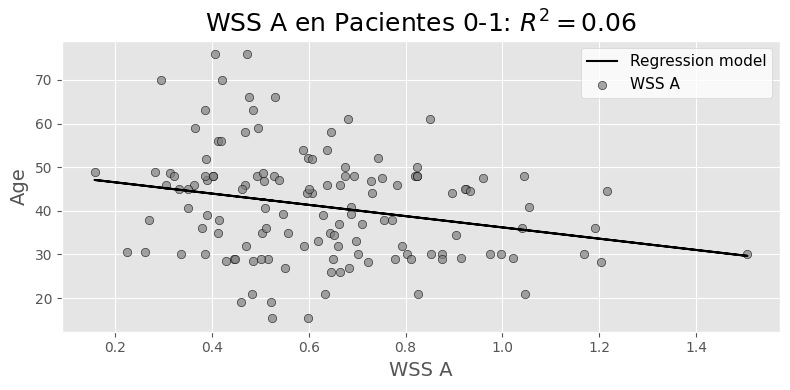

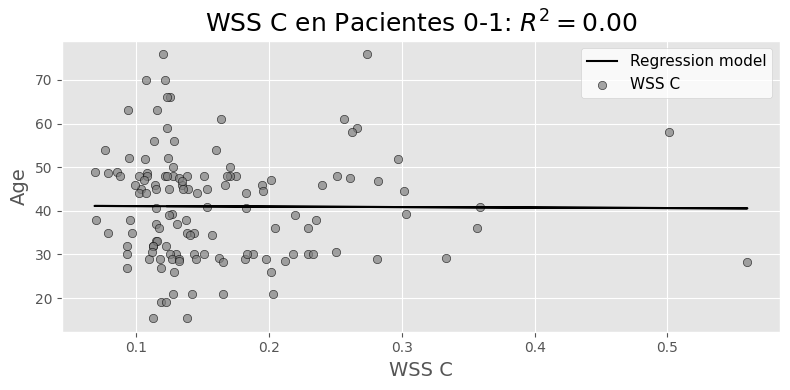

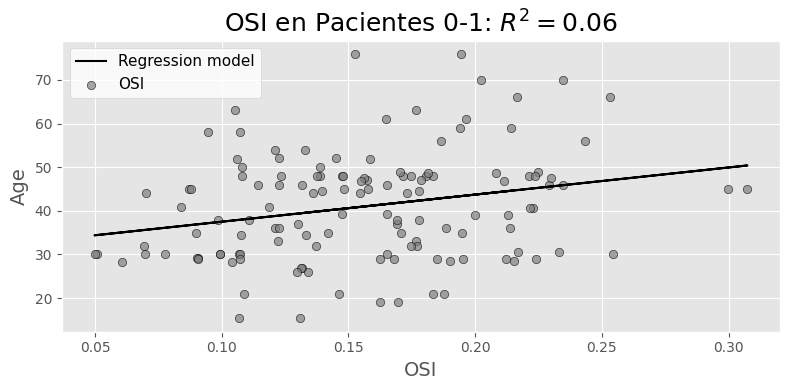

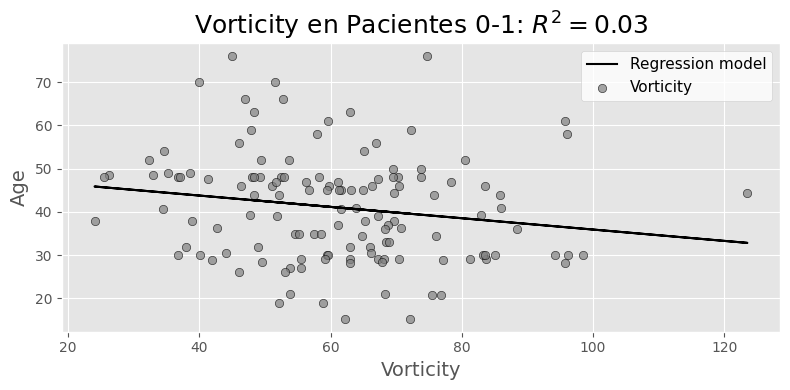

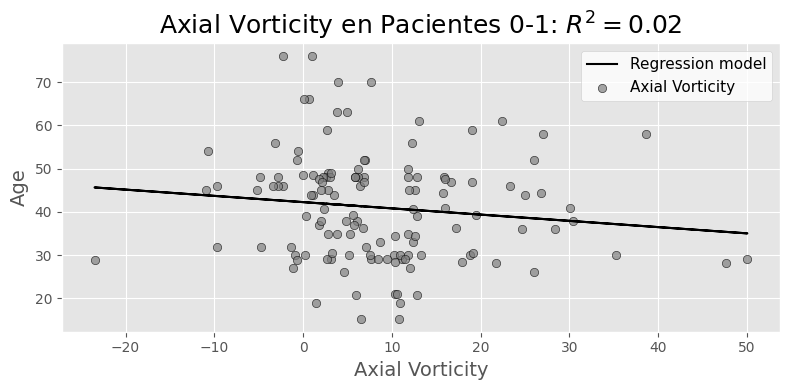

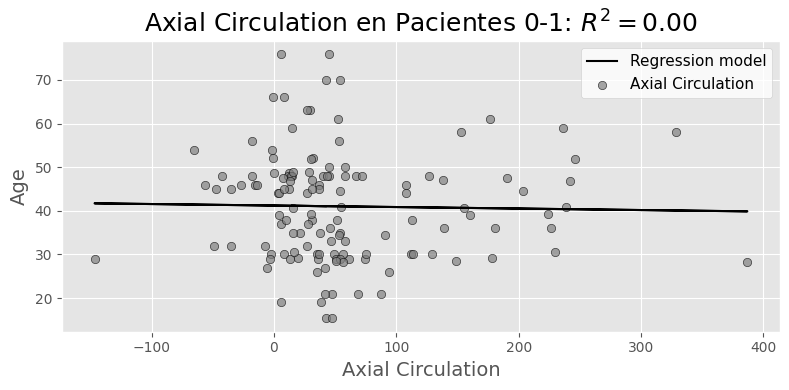

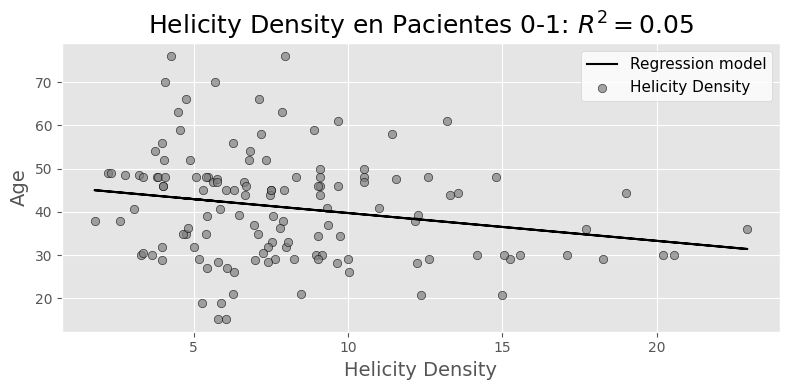

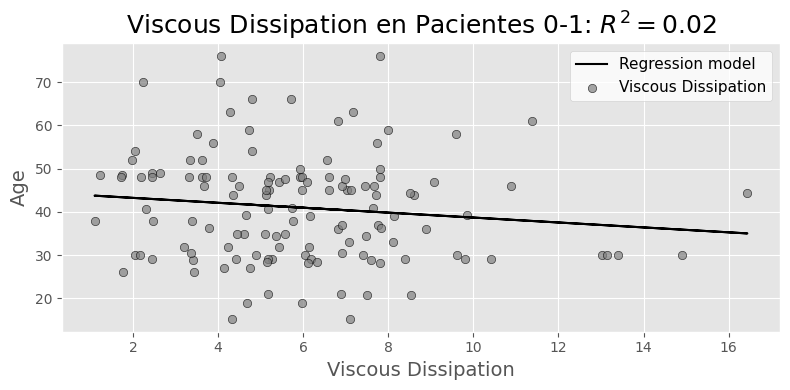

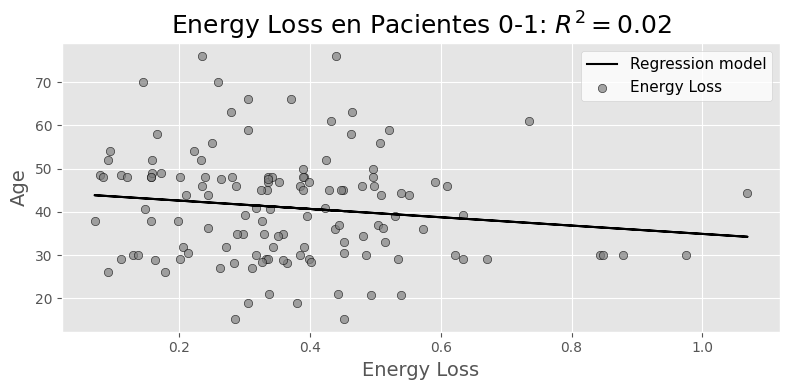

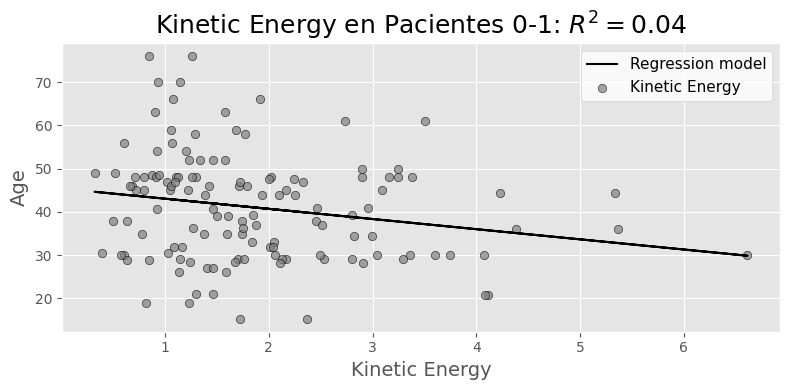

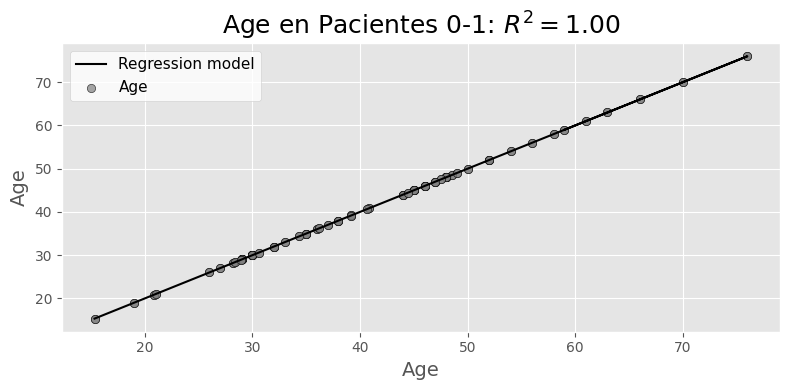

In [7]:
LinearPlot(PAT0and1, "Pacientes 0-1")

# Regresion Lineal Pacientes 0-2

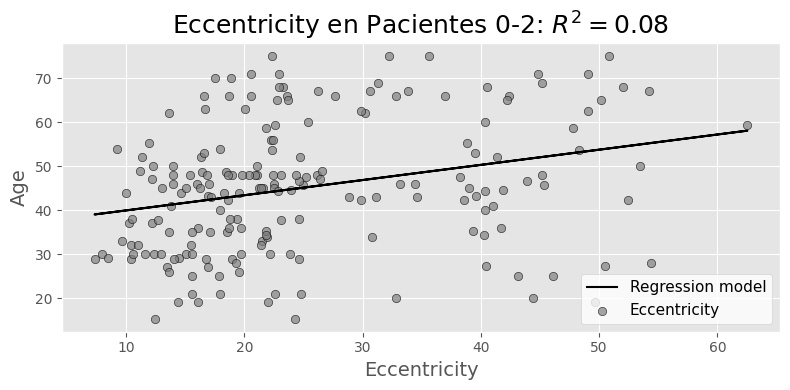

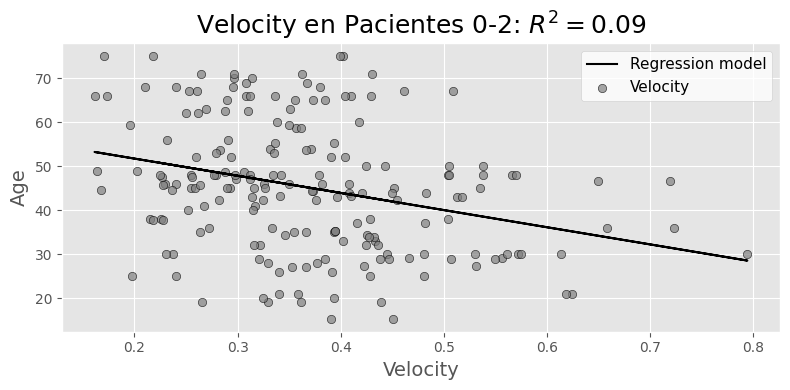

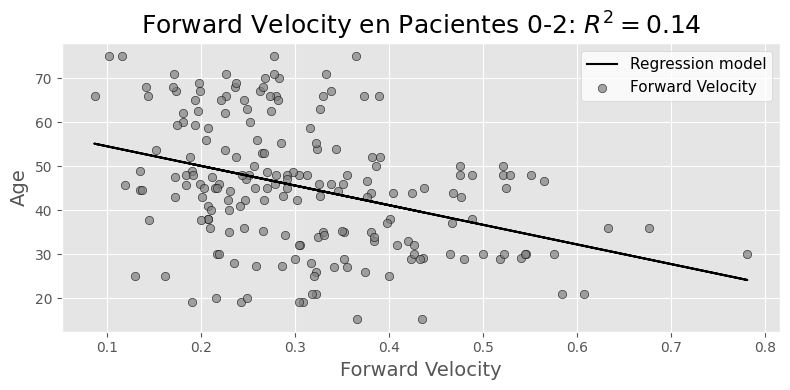

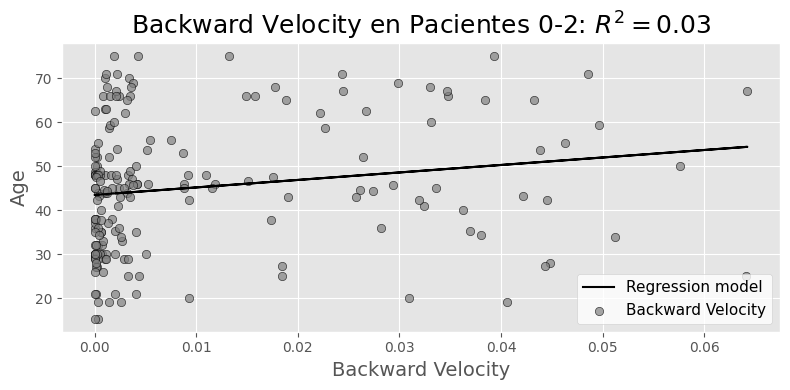

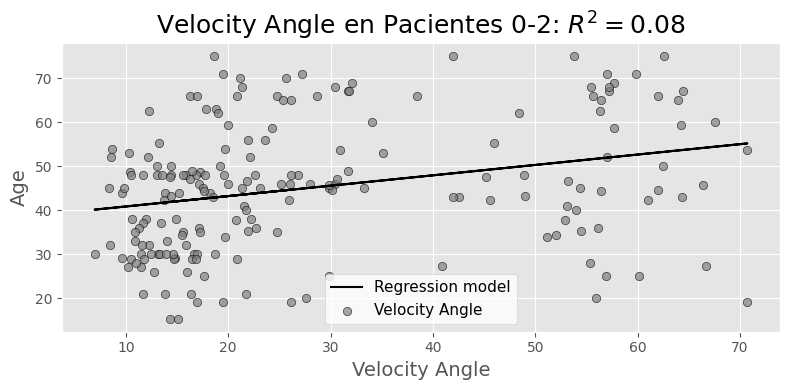

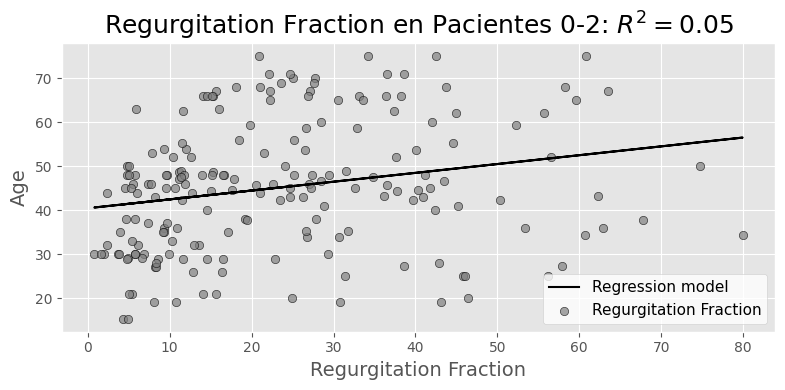

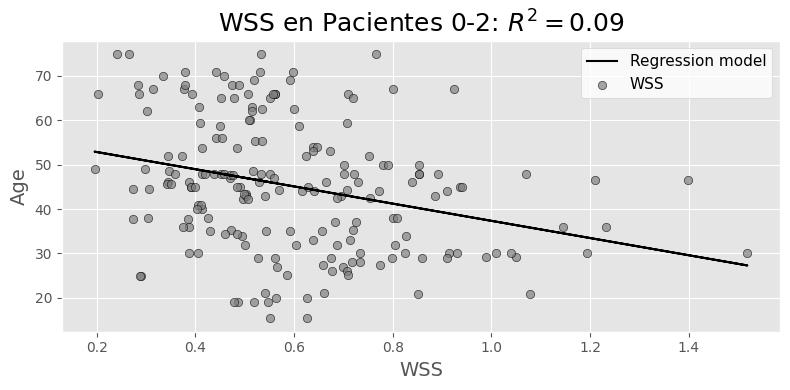

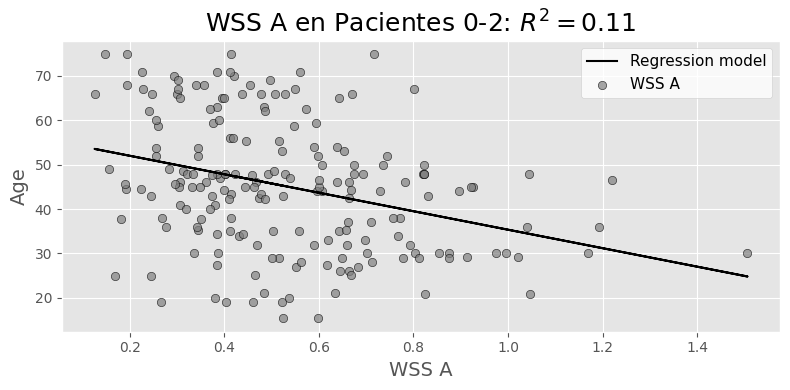

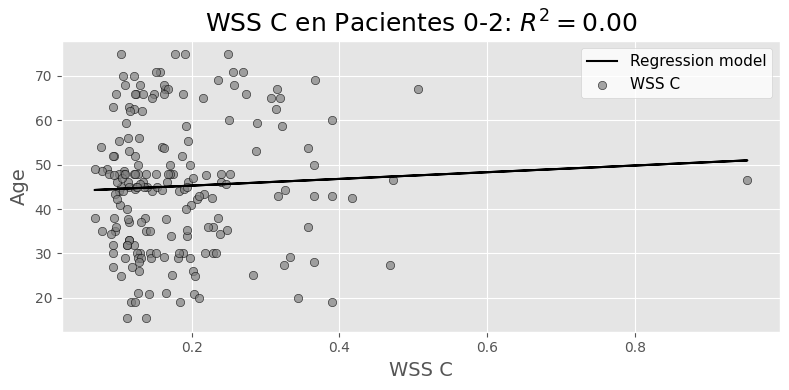

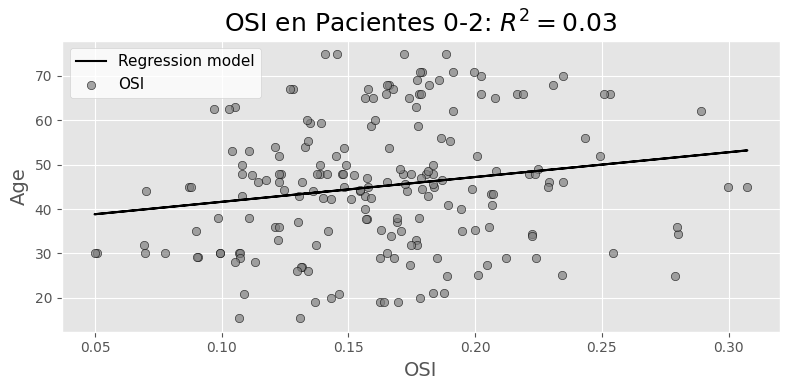

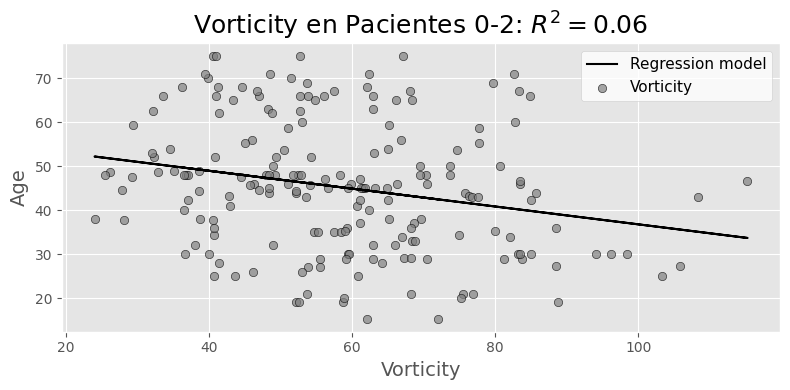

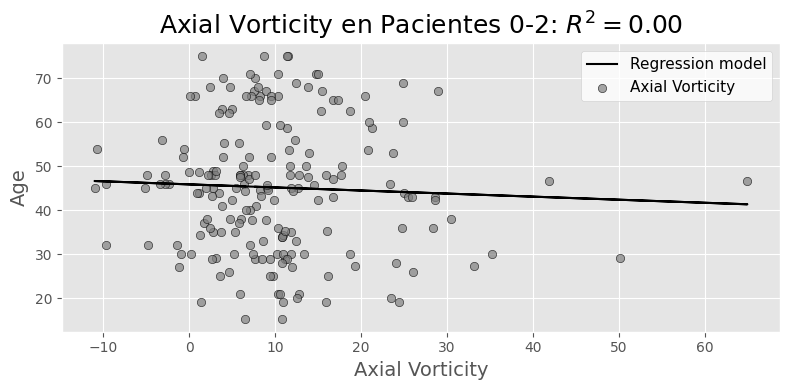

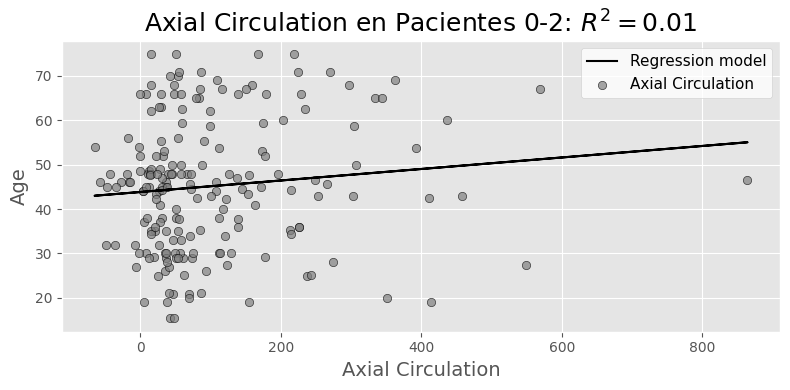

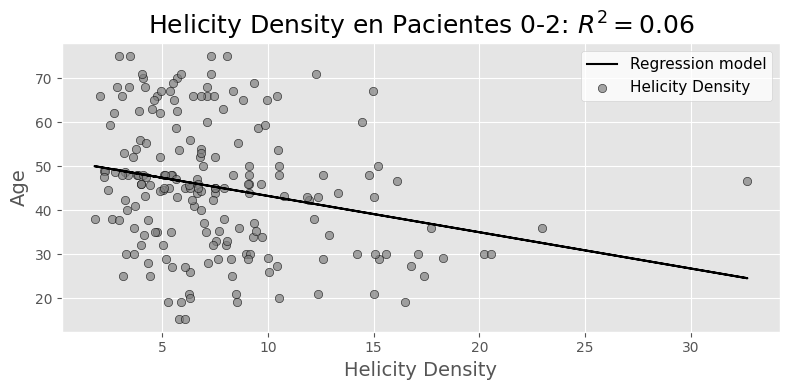

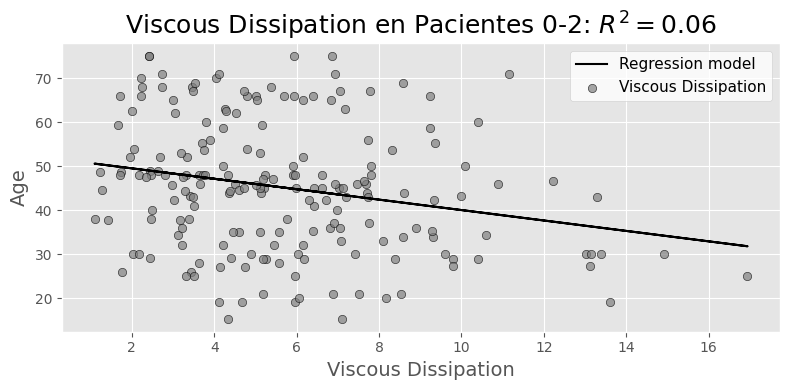

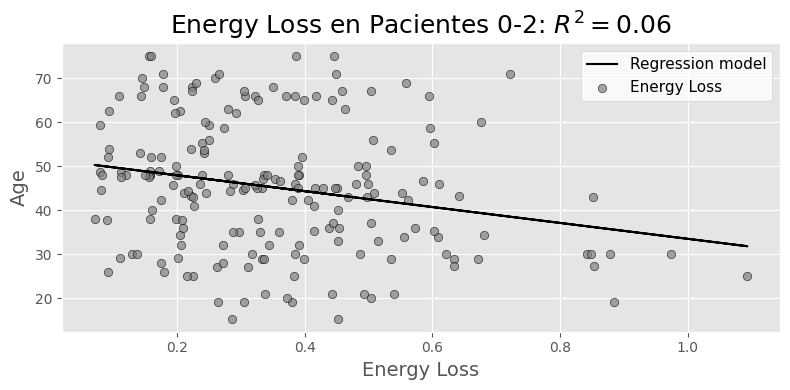

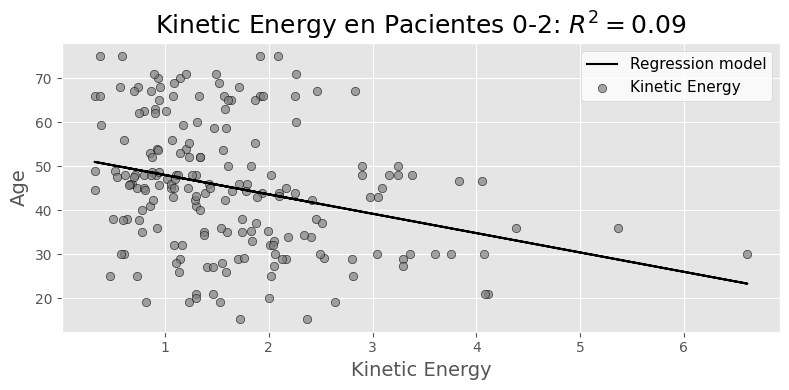

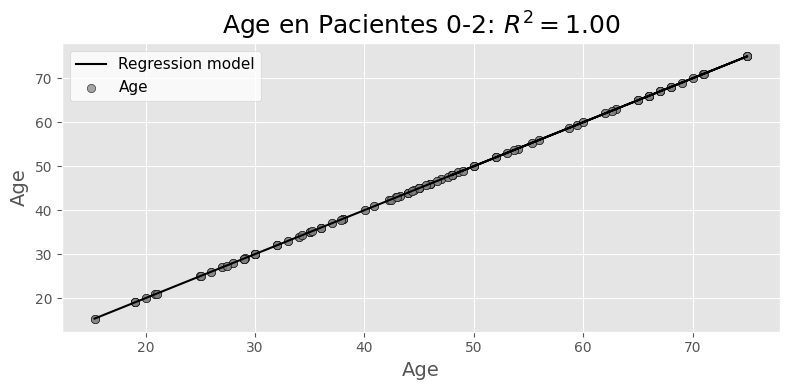

In [8]:
LinearPlot(PAT0and2, "Pacientes 0-2")

# Regresión Lineal Pacientes 1-2

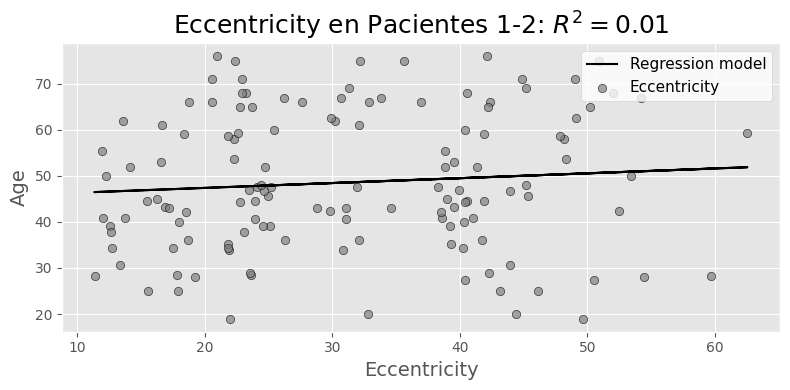

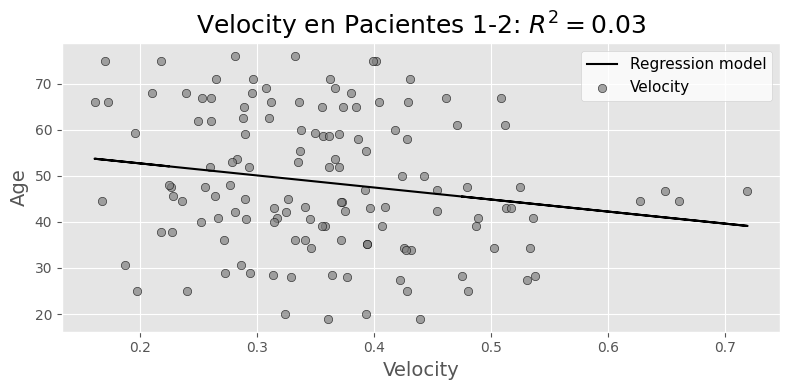

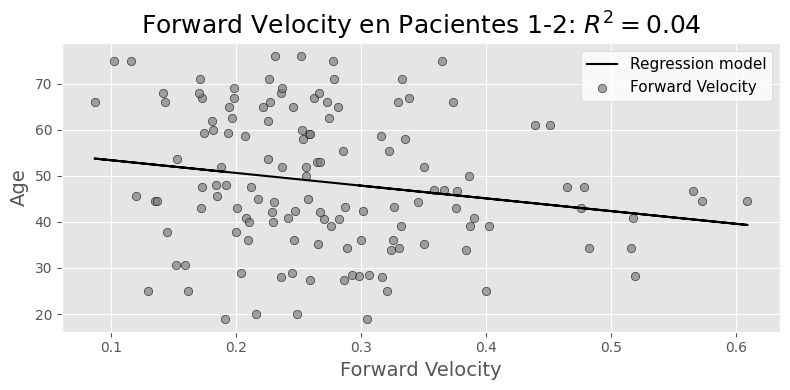

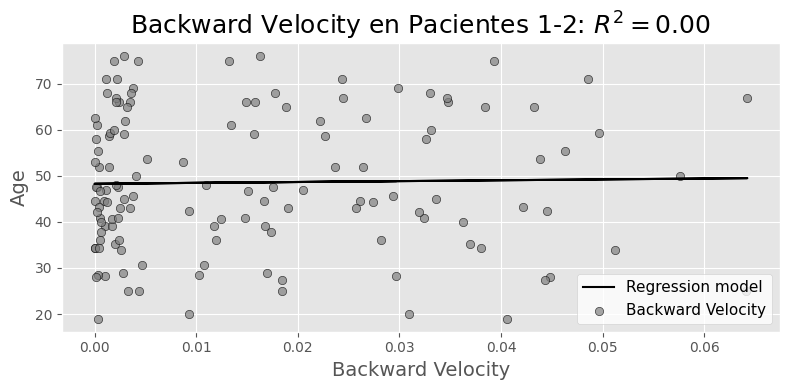

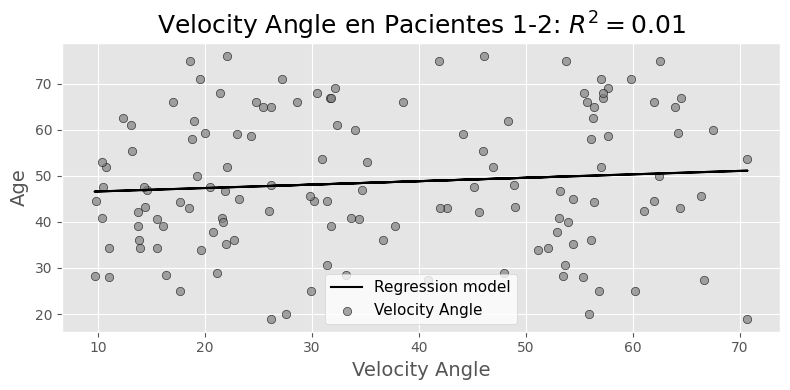

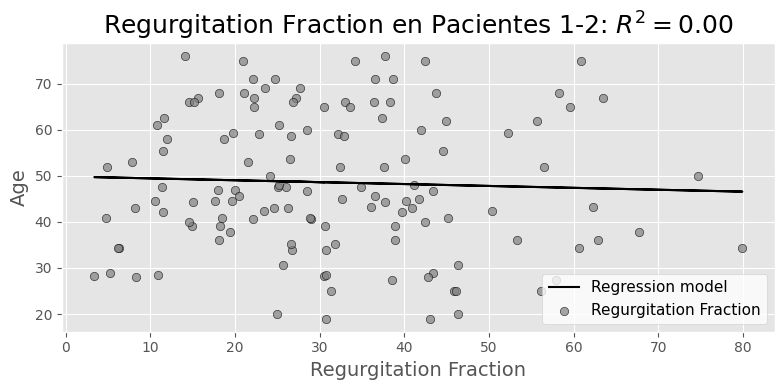

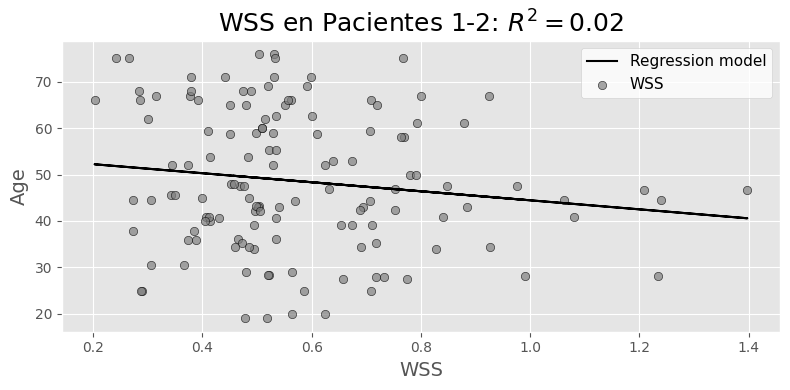

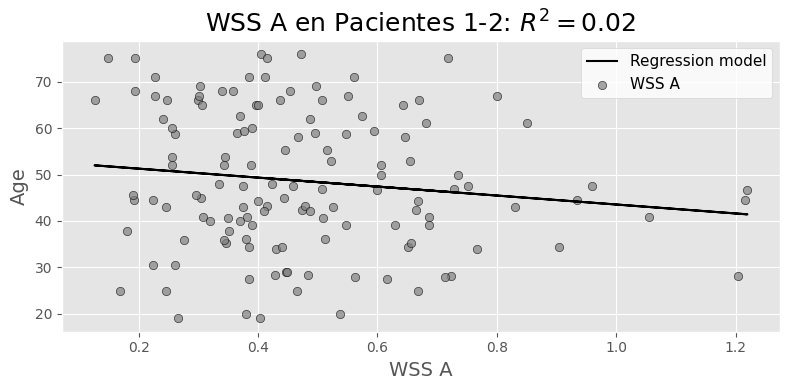

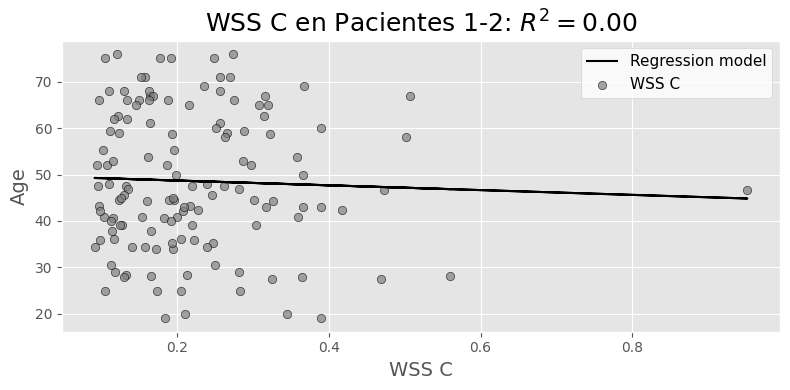

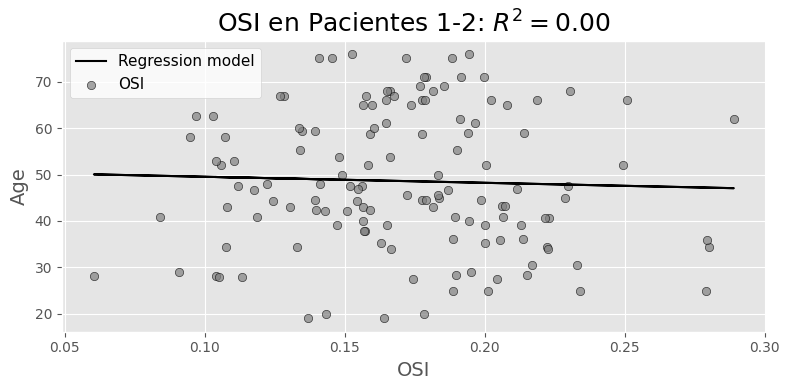

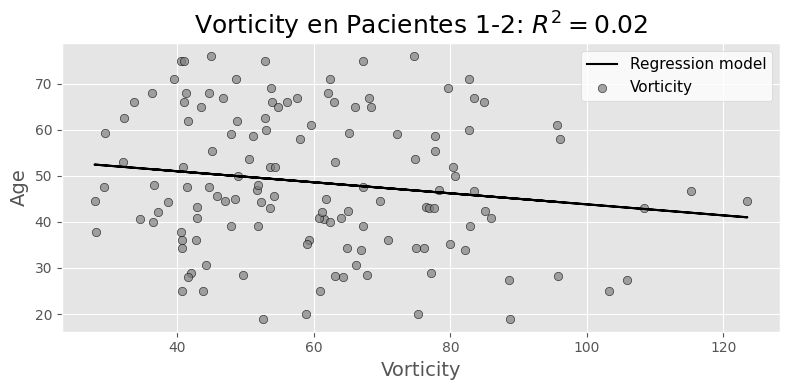

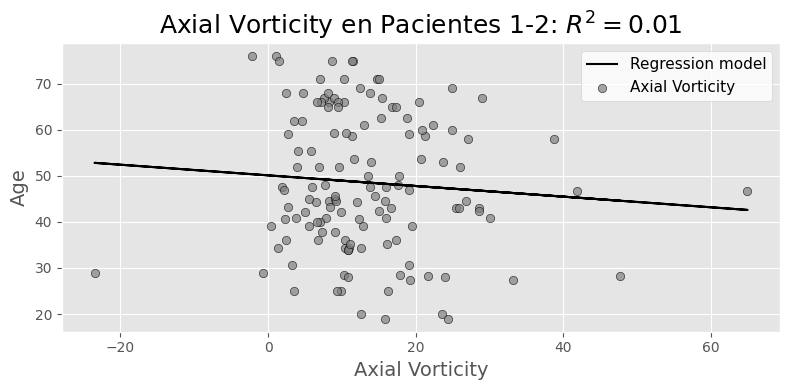

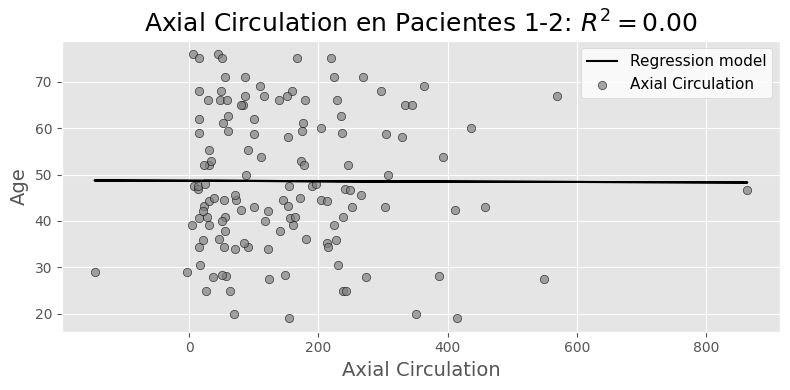

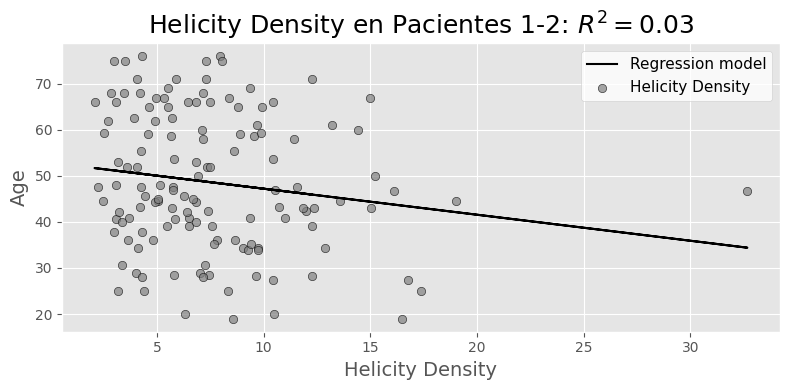

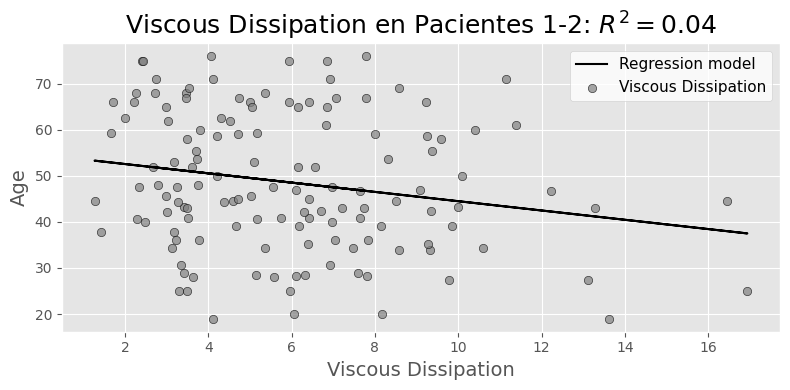

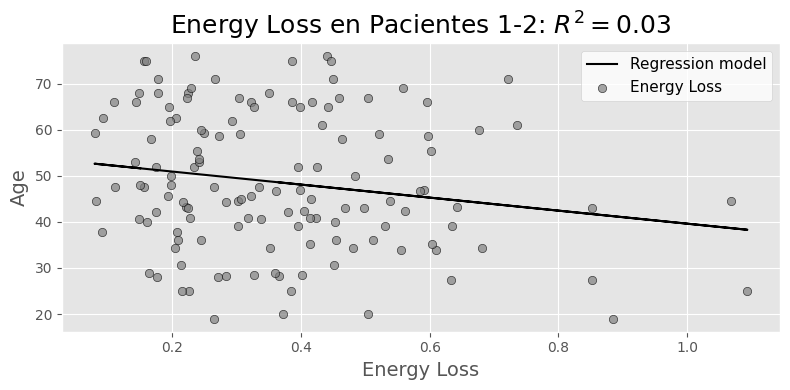

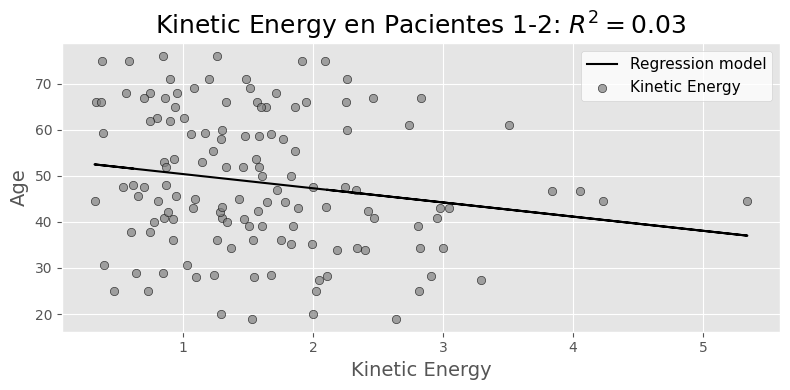

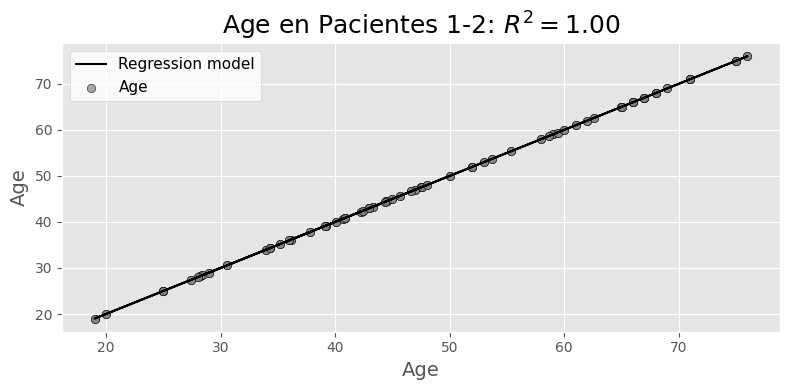

In [9]:
LinearPlot(PAT1and2, "Pacientes 1-2")

# Regresión Lineal Pacientes 0-1-2

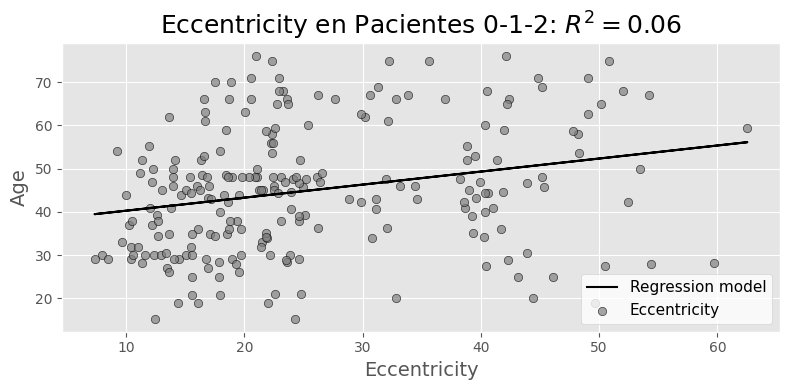

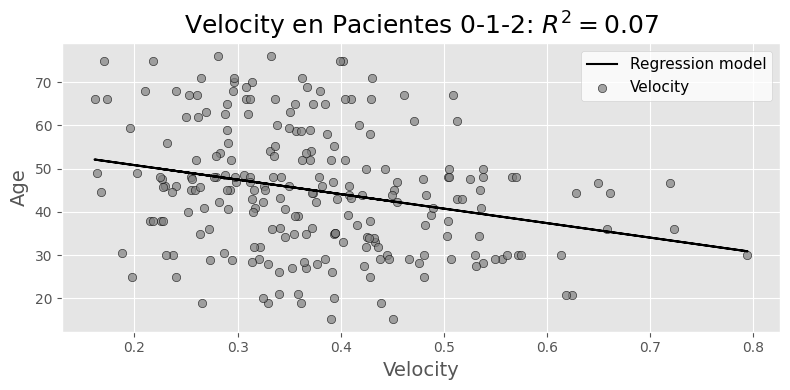

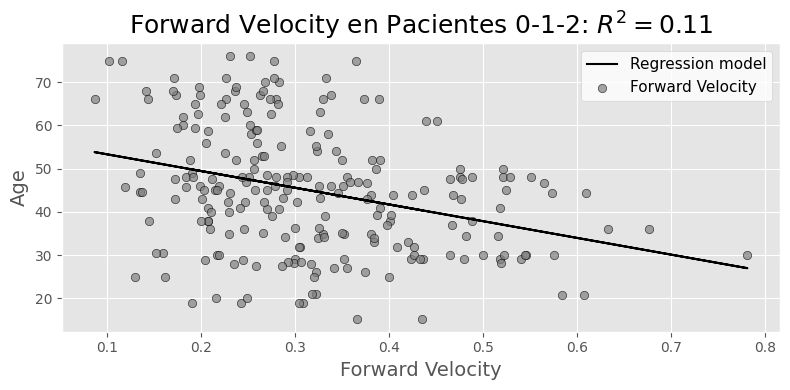

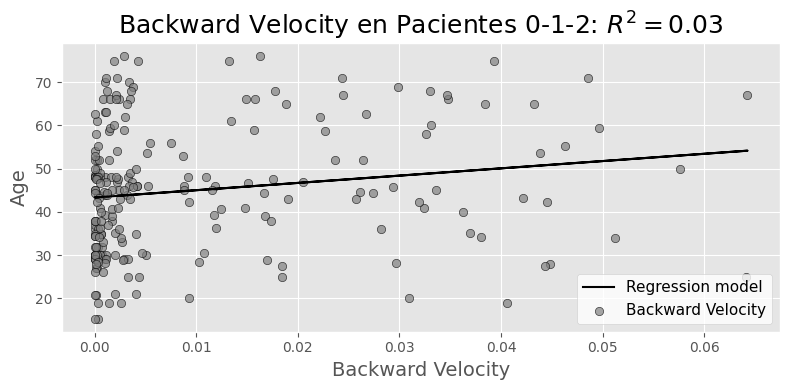

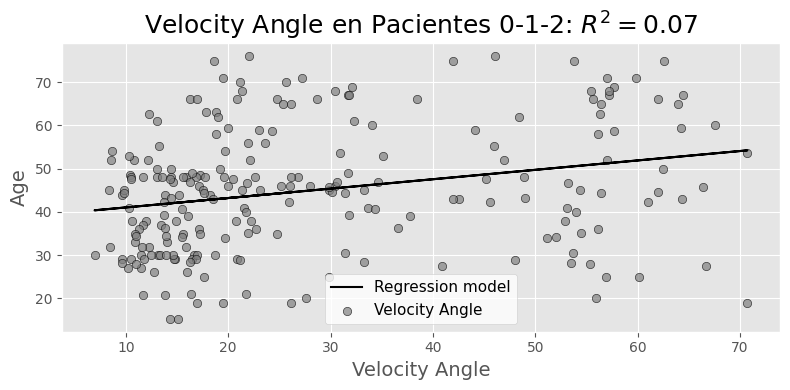

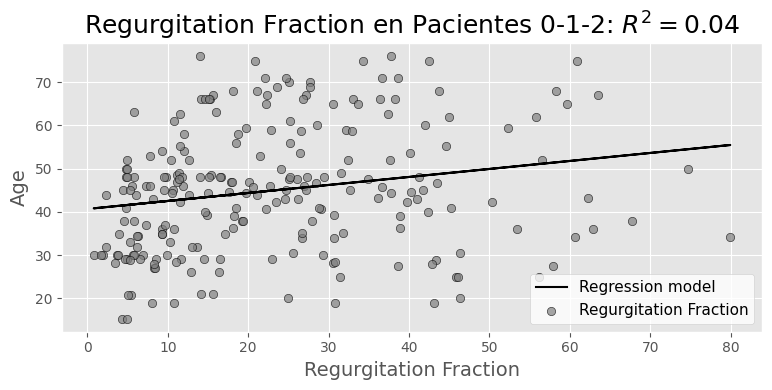

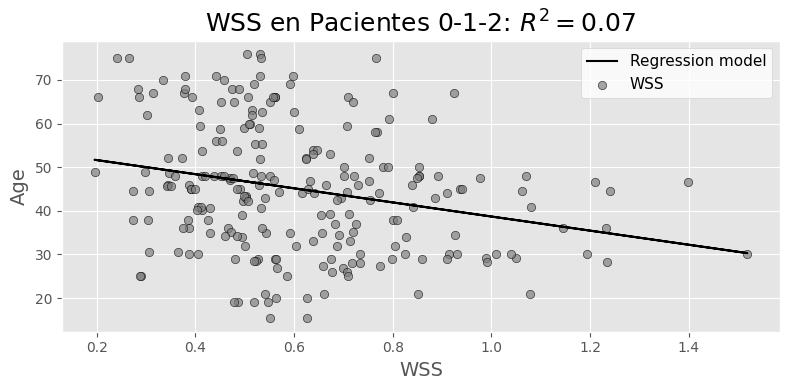

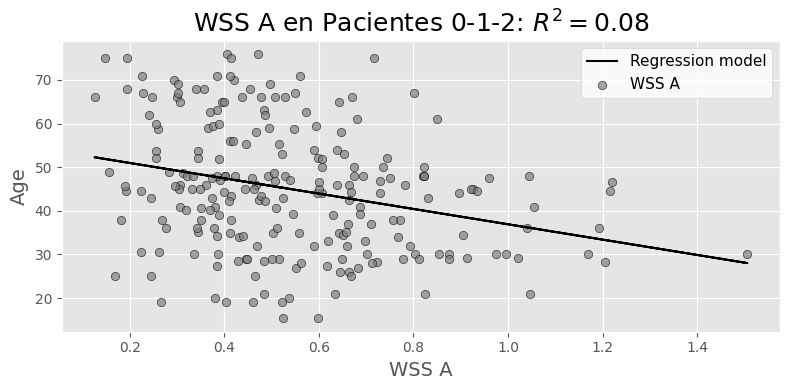

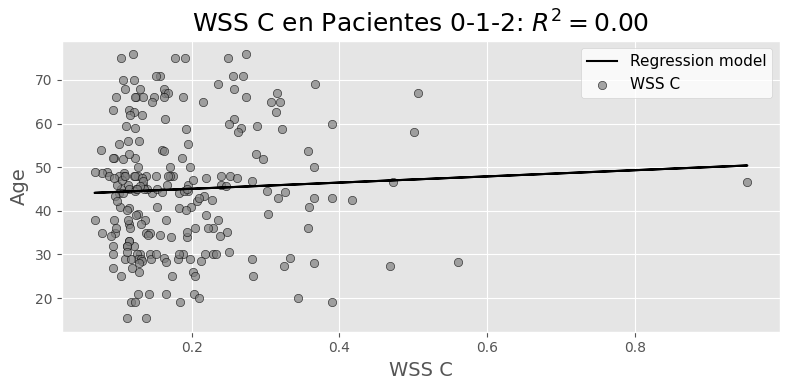

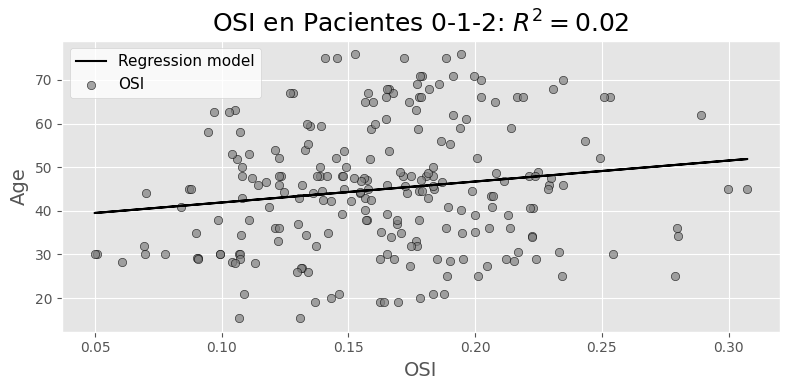

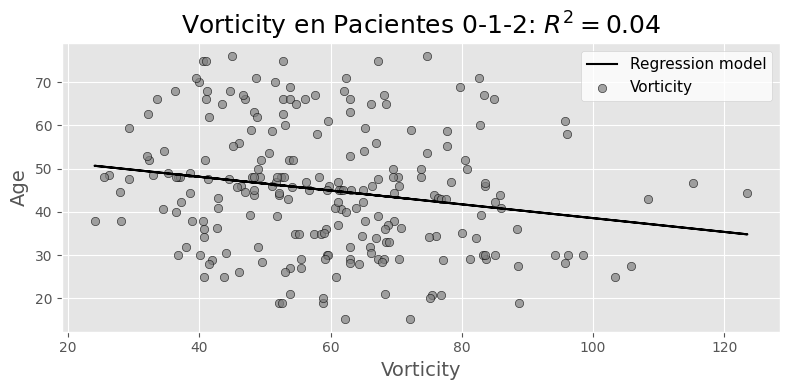

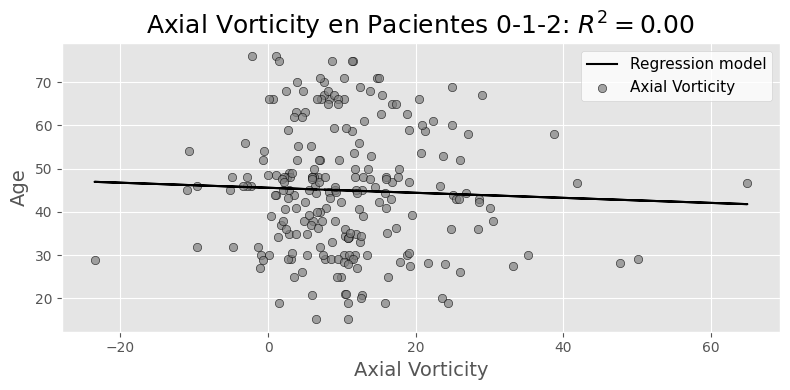

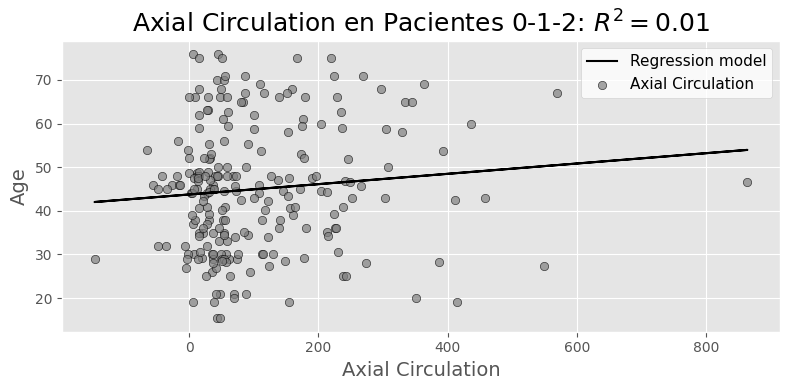

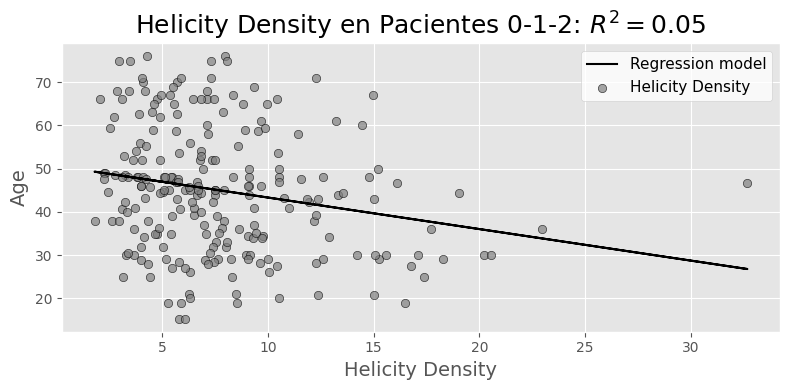

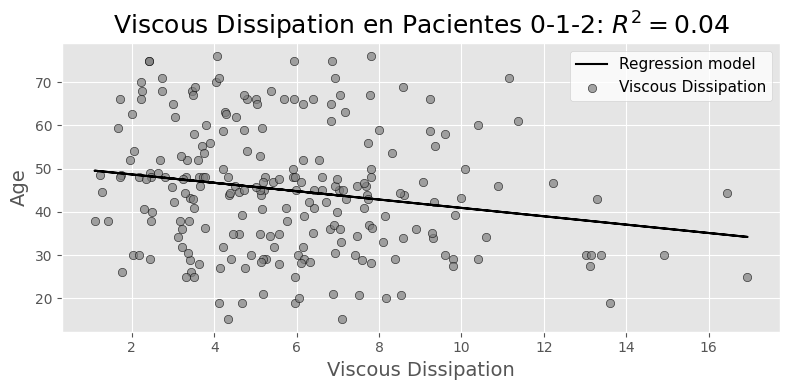

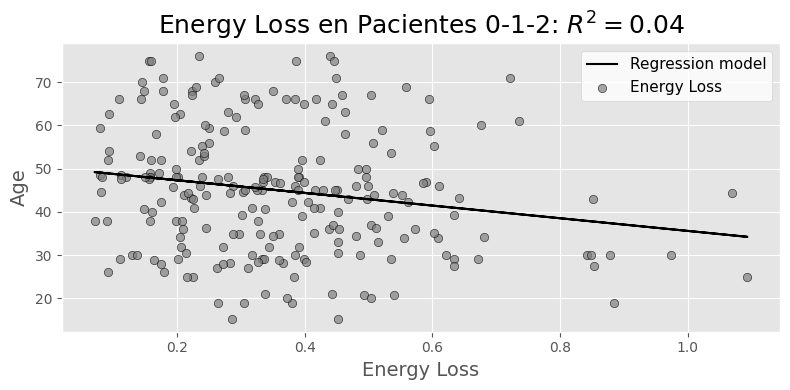

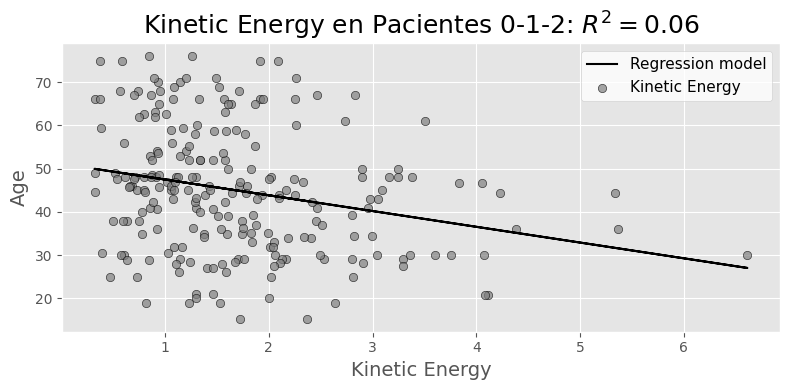

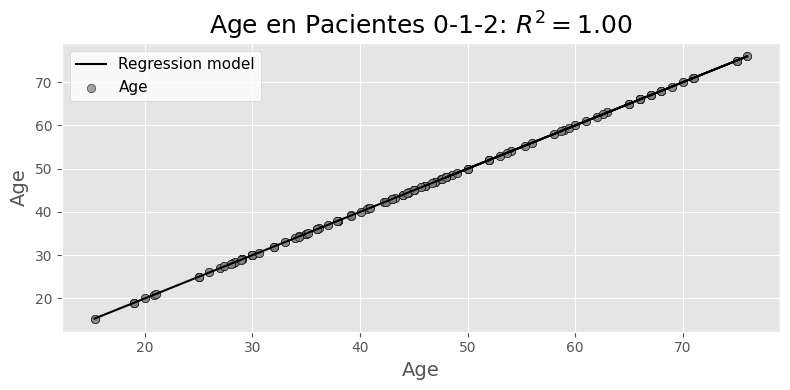

In [10]:
LinearPlot(PAT012, "Pacientes 0-1-2")

# def Regresión Multiple

In [19]:
from sklearn import linear_model
import statsmodels.api as sm


def MultipleRegression(df):
  x = df[['Eccentricity', 'Velocity', 'Forward Velocity', 'Backward Velocity',
        'Velocity Angle', 'Regurgitation Fraction', 'WSS', 'WSS A', 'WSS C',
        'OSI', 'Vorticity', 'Axial Vorticity', 'Axial Circulation',
        'Helicity Density', 'Viscous Dissipation', 'Energy Loss',
        'Kinetic Energy']]
  y = df["Age"]
  
  # with sklearn
  regr = linear_model.LinearRegression()
  regr.fit(x, y)

  print('Intercept: \n', regr.intercept_)
  print('Coefficients: \n', regr.coef_)

  # with statsmodels
  x = sm.add_constant(x) # adding a constant
  
  model = sm.OLS(y, x).fit()
  predictions = model.predict(x) 
  
  print_model = model.summary()
  print(print_model)

# Regresión Multiple Pacientes 0-1

In [20]:
MultipleRegression(PAT0and1)

Intercept: 
 44.84242569368111
Coefficients: 
 [ 1.15649931e-01  1.10182144e+02 -4.42788332e+01  3.31684784e+02
  3.96400216e-01 -2.20413914e-01  1.28585010e+02 -1.41031940e+02
 -8.96881568e+01  3.14438816e+01 -5.83056847e-01  2.71098767e-01
 -6.05048674e-02  8.61257335e-01  1.95604199e+00 -1.83173922e+01
 -1.74055711e+00]
                            OLS Regression Results                            
Dep. Variable:                    Age   R-squared:                       0.173
Model:                            OLS   Adj. R-squared:                  0.049
Method:                 Least Squares   F-statistic:                     1.400
Date:                Tue, 04 Oct 2022   Prob (F-statistic):              0.149
Time:                        02:48:13   Log-Likelihood:                -507.08
No. Observations:                 132   AIC:                             1050.
Df Residuals:                     114   BIC:                             1102.
Df Model:                          17      

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


# Regresión Multiple Pacientes 0-2

In [21]:
MultipleRegression(PAT0and2)

Intercept: 
 33.20227406483499
Coefficients: 
 [ 2.28397215e-01 -5.01980844e+01  4.73823691e+01 -4.81766187e+01
  4.28796502e-01 -2.43918355e-01 -8.21482422e+01  8.67632780e+01
  1.08123398e+02  6.12359784e+01 -2.14211693e-01 -4.41174212e-01
  2.05533902e-02 -3.43866256e-01 -2.35617487e+00  2.03590801e+01
  7.17223065e-01]
                            OLS Regression Results                            
Dep. Variable:                    Age   R-squared:                       0.255
Model:                            OLS   Adj. R-squared:                  0.184
Method:                 Least Squares   F-statistic:                     3.552
Date:                Tue, 04 Oct 2022   Prob (F-statistic):           9.71e-06
Time:                        02:48:41   Log-Likelihood:                -767.80
No. Observations:                 194   AIC:                             1572.
Df Residuals:                     176   BIC:                             1630.
Df Model:                          17      

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


# Regresión Multiple Pacientes 1-2

In [22]:
MultipleRegression(PAT1and2)

Intercept: 
 36.55222016541386
Coefficients: 
 [ 3.61015536e-01 -4.24134101e+02  3.43192090e+02  3.66693353e+02
  3.21861563e-01 -2.34833016e-01  2.08931612e+02 -1.52354748e+02
 -3.44590835e+01  2.29913085e+01  3.34470504e-01 -8.75950057e-01
  8.37141743e-02  2.00061684e+00 -1.36485844e+01  1.52267801e+02
 -3.81960523e+00]
                            OLS Regression Results                            
Dep. Variable:                    Age   R-squared:                       0.193
Model:                            OLS   Adj. R-squared:                  0.074
Method:                 Least Squares   F-statistic:                     1.630
Date:                Tue, 04 Oct 2022   Prob (F-statistic):             0.0675
Time:                        02:49:08   Log-Likelihood:                -537.25
No. Observations:                 134   AIC:                             1110.
Df Residuals:                     116   BIC:                             1163.
Df Model:                          17      

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


# Regresión Multiple Pacientes 0-1-2

In [23]:
MultipleRegression(PAT012)

Intercept: 
 35.36378333065219
Coefficients: 
 [ 2.27577087e-01 -1.52852746e+02  1.38087041e+02  1.31532560e+02
  4.12340909e-01 -2.41957513e-01  5.63929095e+01 -4.20643883e+01
  3.59033698e+01  5.95223686e+01 -1.84807581e-01 -3.47879807e-01
  2.66874834e-02 -2.62637627e-01 -3.37104035e+00  3.47987799e+01
  1.77039539e+00]
                            OLS Regression Results                            
Dep. Variable:                    Age   R-squared:                       0.206
Model:                            OLS   Adj. R-squared:                  0.143
Method:                 Least Squares   F-statistic:                     3.241
Date:                Tue, 04 Oct 2022   Prob (F-statistic):           3.32e-05
Time:                        02:49:27   Log-Likelihood:                -913.28
No. Observations:                 230   AIC:                             1863.
Df Residuals:                     212   BIC:                             1924.
Df Model:                          17      

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
